## Crypto Portfolio Optimization 
### Exploratory Data Analysis

In [1]:
import yfinance as yf
import pandas as pd

c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df=pd.read_csv('data/top_crypto.csv', sep=",")
#df.drop(index=1, inplace=True)
df.head(3)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,BTC
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC
...,...,...,...,...,...,...,...,...
27807,2024-02-16,5.867093,5.985244,5.662748,5.795270,5.795270,197993160,FIL
27808,2024-02-17,5.795997,6.377146,5.710954,6.199124,6.199124,456255634,FIL
27809,2024-02-18,6.200620,6.421569,6.070881,6.275468,6.275468,318232526,FIL
27810,2024-02-19,6.275813,7.770802,6.230459,7.427044,7.427044,797819922,FIL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27812 entries, 0 to 27811
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       27812 non-null  object 
 1   Open       27812 non-null  float64
 2   High       27812 non-null  float64
 3   Low        27812 non-null  float64
 4   Close      27812 non-null  float64
 5   Adj Close  27812 non-null  float64
 6   Volume     27812 non-null  int64  
 7   Symbol     27812 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.7+ MB


### Crypto Market History Data - EDA 

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,27812.000000,27812.000000,27812.000000,27812.000000,27812.000000,2.781200e+04
mean,3123.640136,3197.723891,3047.417652,3125.079522,3125.079522,1.114307e+10
std,10289.052056,10561.017634,10033.286306,10293.563431,10293.563431,6.839605e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.774990,0.803392,0.750245,0.775093,0.775093,1.535404e+08
50%,5.559620,5.762832,5.368767,5.562024,5.562024,5.023389e+08
75%,142.168560,148.459747,135.370407,142.449856,142.449856,2.215812e+09
max,67549.734375,162188.250000,66458.726562,67566.828125,67566.828125,8.325207e+13


### Bitcoin EDA

#### Closing Price over the years 

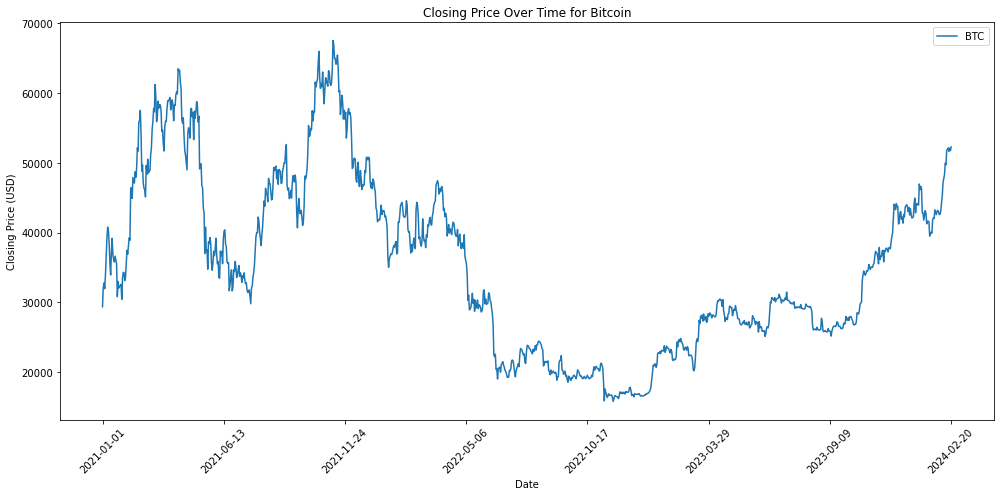

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

btc_df = df[df['Symbol'] == 'BTC']

# Plot Bitcoin's closing price
plt.figure(figsize=(14, 7))
plt.plot(btc_df['Date'], btc_df['Close'], label='BTC')

# Simplify the date ticks to display only 8 dates
plt.xticks(pd.date_range(start=btc_df['Date'].min(), end=btc_df['Date'].max(), periods=8))

plt.title('Closing Price Over Time for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Volume over the years 

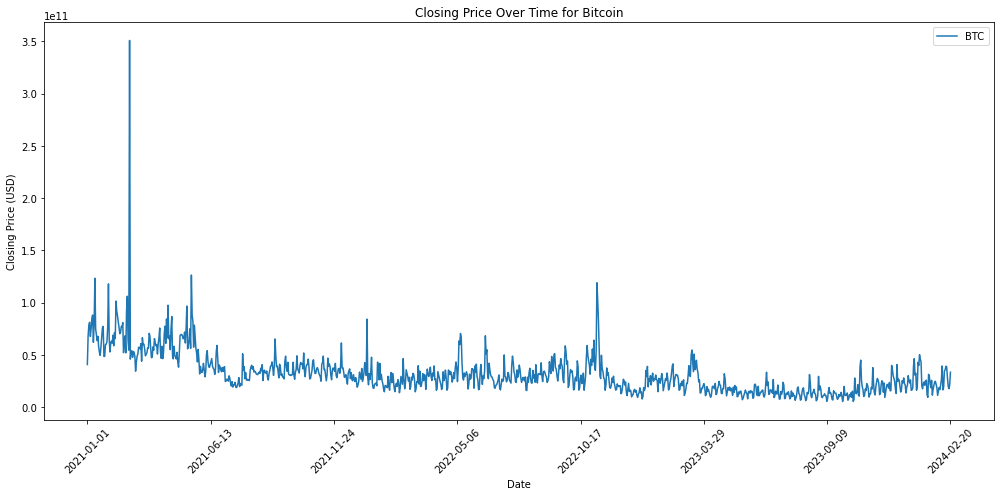

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

btc_df = df[df['Symbol'] == 'BTC']

# Plot Bitcoin's closing price
plt.figure(figsize=(14, 7))
plt.plot(btc_df['Date'], btc_df['Volume'], label='BTC')

# Simplify the date ticks to display only 8 dates
plt.xticks(pd.date_range(start=btc_df['Date'].min(), end=btc_df['Date'].max(), periods=8))

plt.title('Closing Price Over Time for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
import numpy as np
corr = df_stocks[['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Open,Low,Close,Adjusted_Close,Volume
Open,1.000000,0.999679,0.999786,0.999465,-0.218471
Low,0.999679,1.000000,0.999803,0.999349,-0.222898
Close,0.999786,0.999803,1.000000,0.999611,-0.220610
Adjusted_Close,0.999465,0.999349,0.999611,1.000000,-0.220514
Volume,-0.218471,-0.222898,-0.220610,-0.220514,1.000000


Open, Low, Close, and Adjusted_Close prices are highly positively correlated with each other, simce because they are all measures of stock prices within the same trading day.

#### Moving Averages


##### 30-day

In [84]:
# Calculate 30-day Moving Averages for the Closing Prices of each stock
df_stocks['30_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=30).mean())

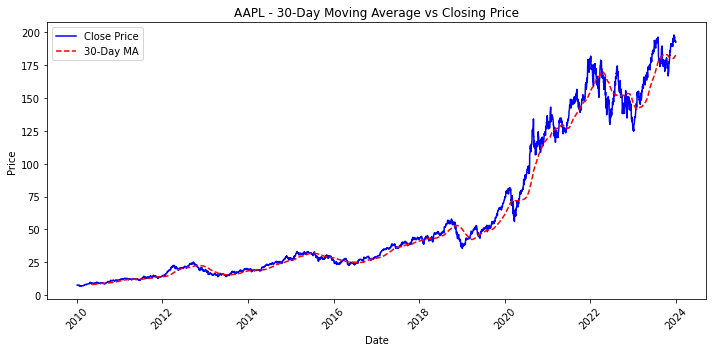

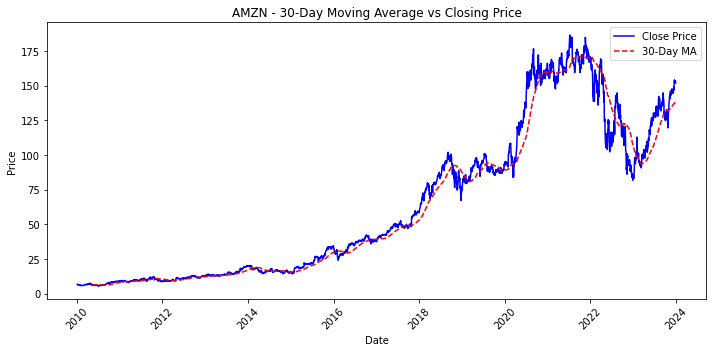

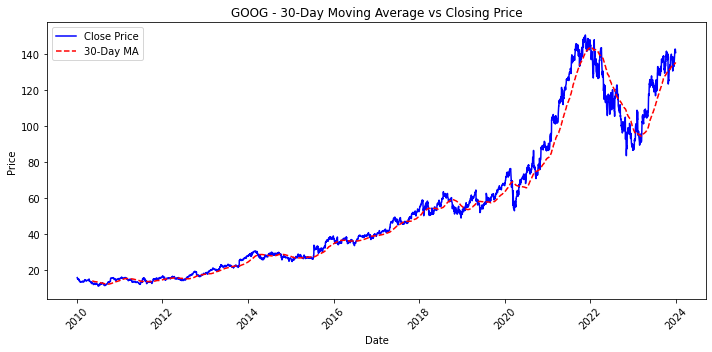

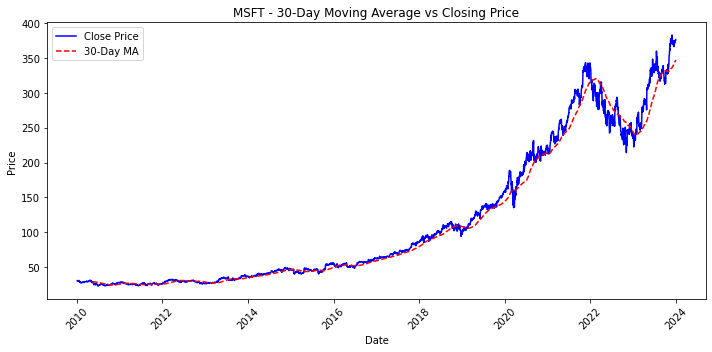

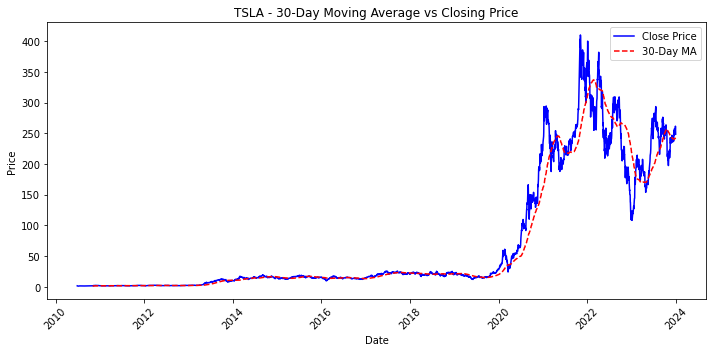

In [81]:
stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['30_day_MA'], label='30-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 30-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 60-day

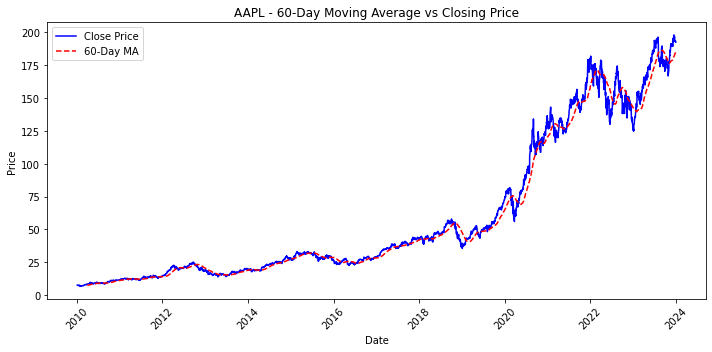

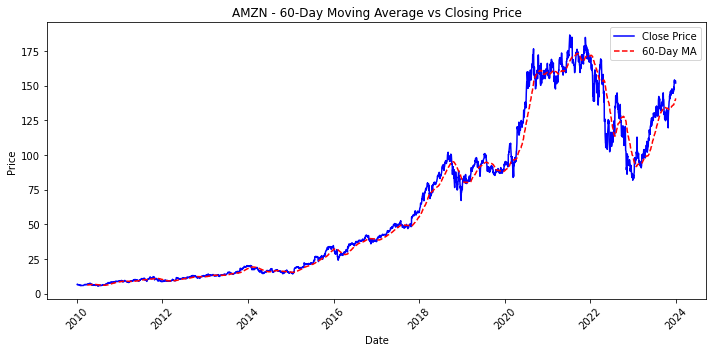

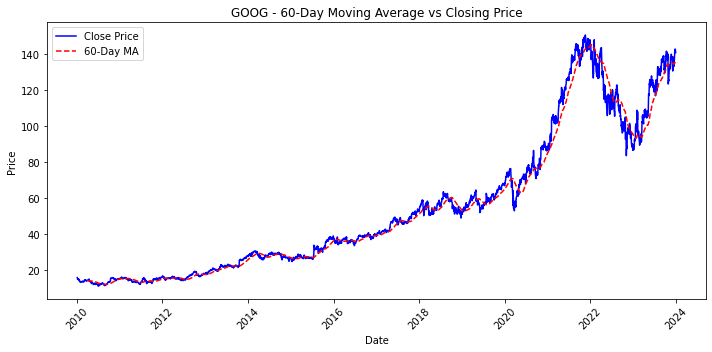

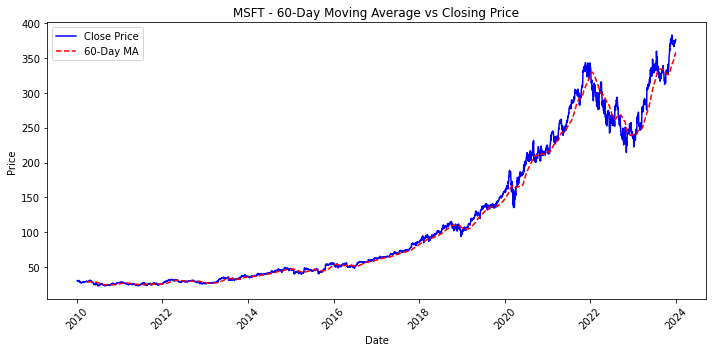

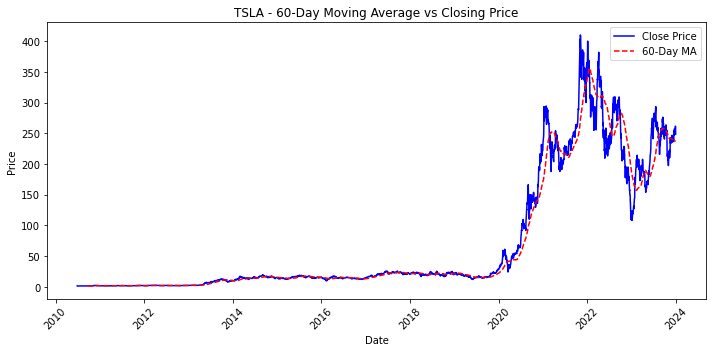

In [86]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['60_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=60).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### 90-day

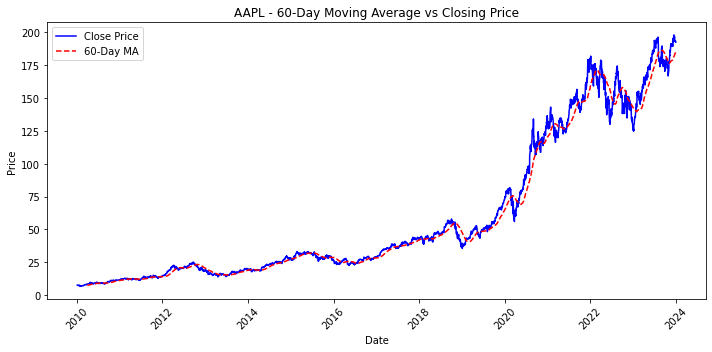

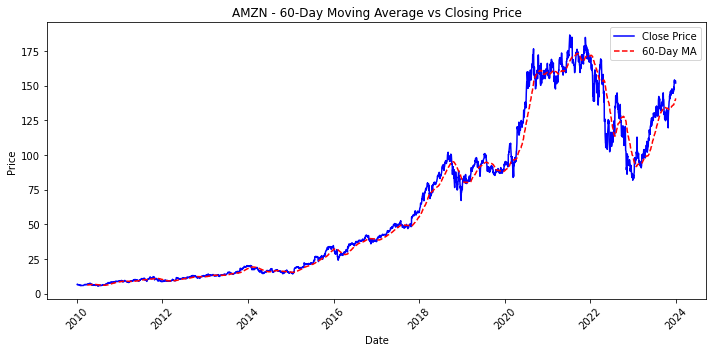

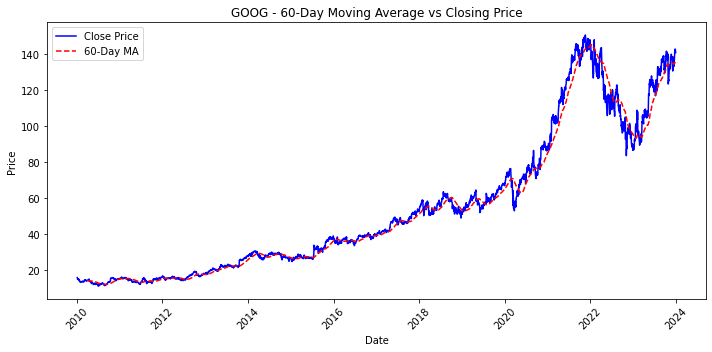

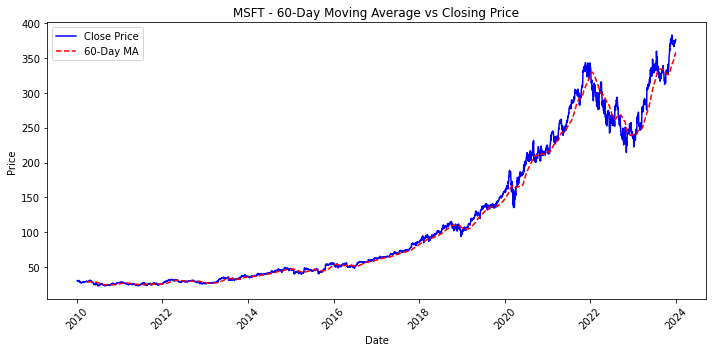

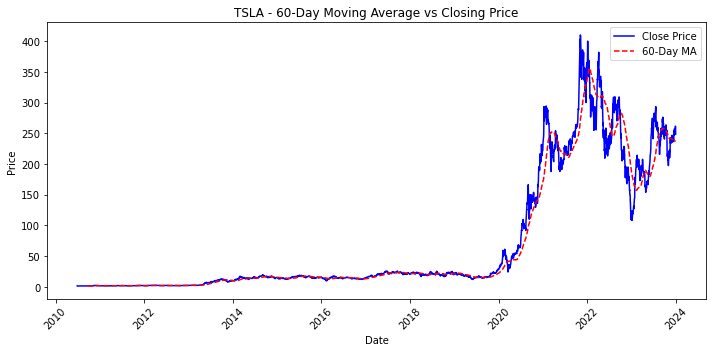

In [87]:
# Calculate 60-day Moving Averages for the Closing Prices of each stock
df_stocks['90_day_MA'] = df_stocks_pivoted.groupby('Stock')['Close'].transform(lambda x: x.rolling(window=90).mean())

stocks = df_stocks['Stock'].unique()

# Creating a separate plot for each stock
for stock in stocks:
    subset = df_stocks[df_stocks['Stock'] == stock]
    
    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price', color='blue')
    plt.plot(subset['Date'], subset['60_day_MA'], label='60-Day MA', linestyle='--', color='red')
    
    plt.title(f'{stock} - 60-Day Moving Average vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [91]:
df_stocks.drop(['30_day_MA', '60_day_MA', '90_day_MA'], axis=1, inplace=True)


#### Seasonality Analysis

In [93]:
df_seasonality =  df_stocks

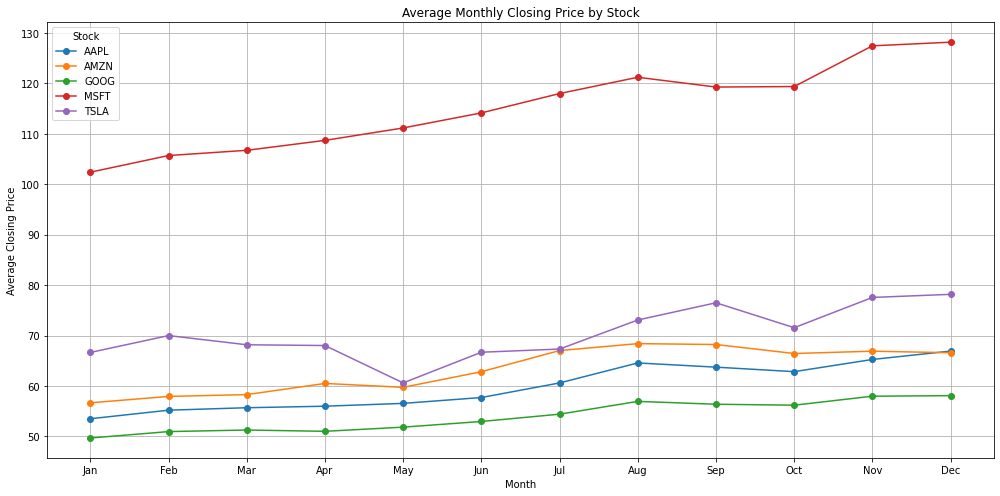

In [94]:
# Resample data to monthly and calculate average closing price for each stock
df_seasonality['Month'] = df_seasonality['Date'].dt.month
monthly_avg = df_seasonality.groupby(['Stock', 'Month'])['Close'].mean().unstack(level=0)

# Plot the monthly average closing price for each stock
monthly_avg.plot(figsize=(14, 7), marker='o')
plt.title('Average Monthly Closing Price by Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Stock')
plt.tight_layout()
plt.show()

#### Outliers

##### Box plot 

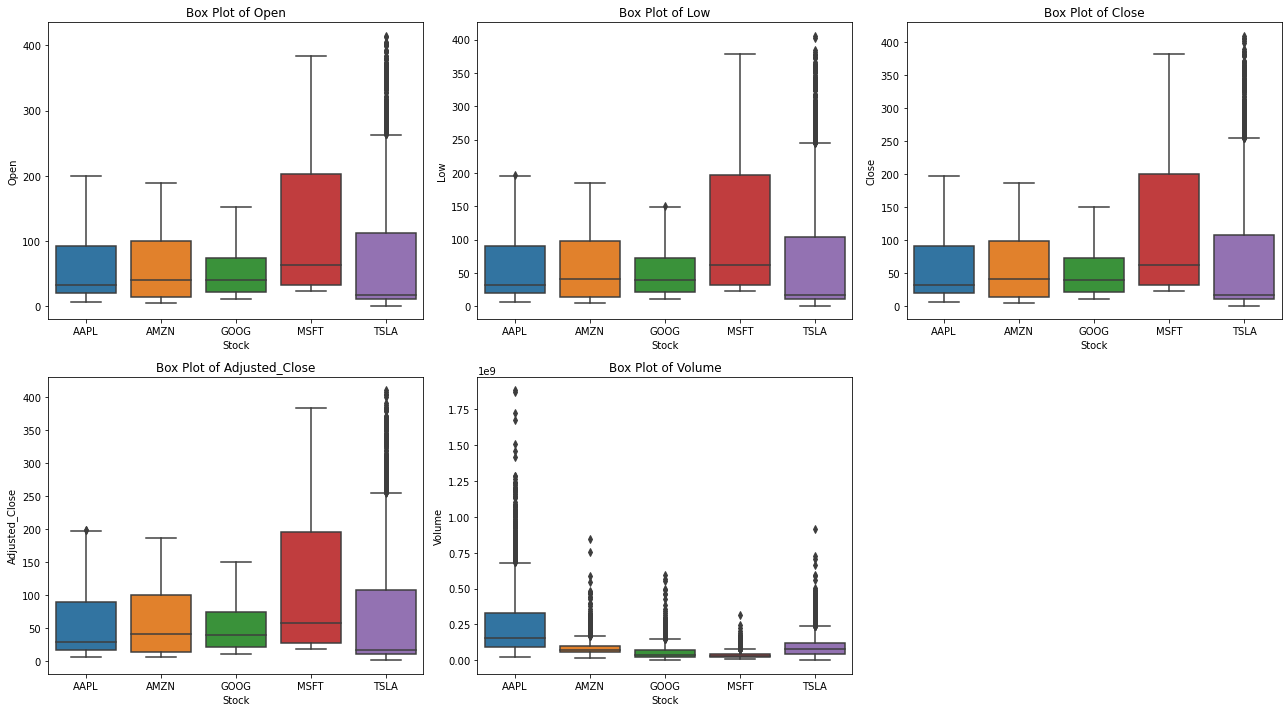

In [96]:
# Box Plots for Numerical Features to Identify Outliers

plt.figure(figsize=(18, 10))

# Creating a subplot for each numerical feature
for i, column in enumerate(['Open', 'Low', 'Close', 'Adjusted_Close', 'Volume'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Stock', y=column, data=df_stocks_pivoted)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Stock')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


##### Volatility- Daily Price changes 

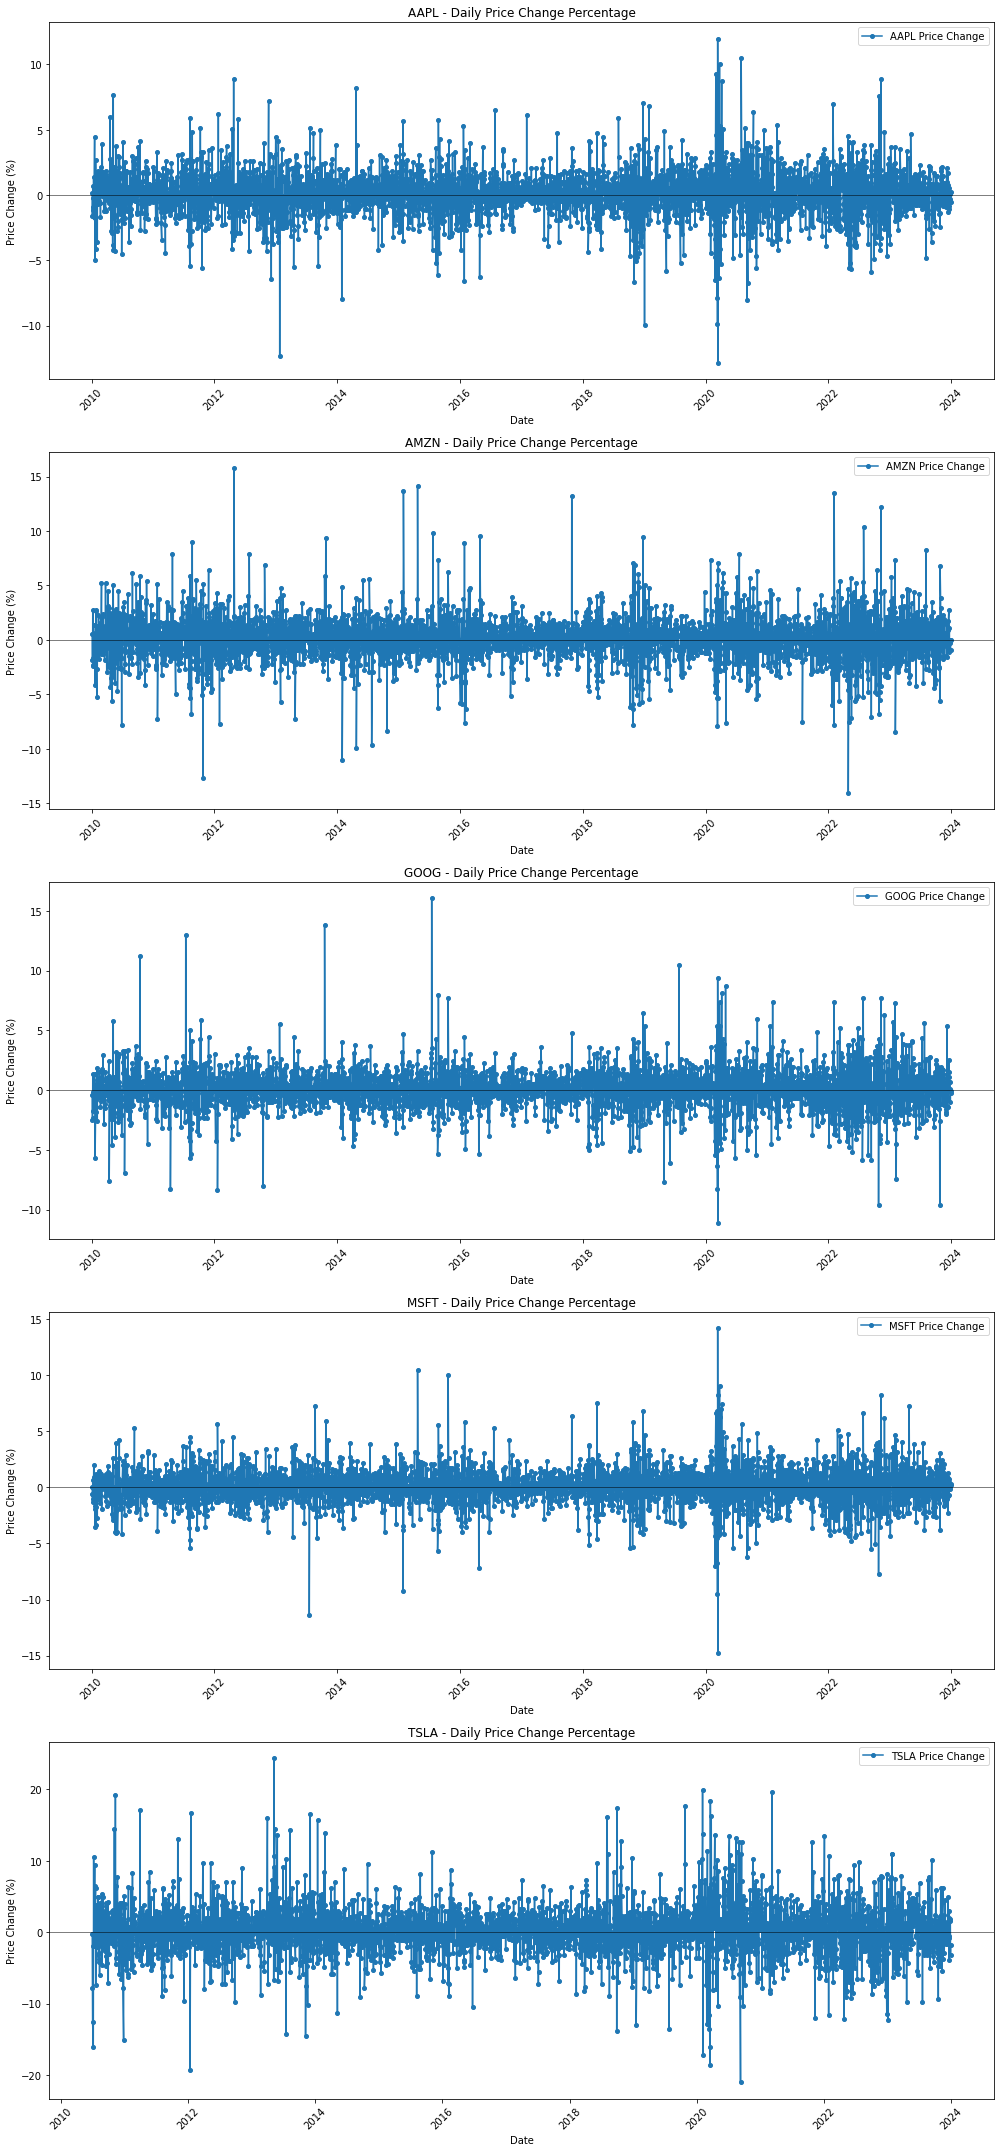

In [102]:
df_stocks_volatility = df_stocks

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2020 to the present

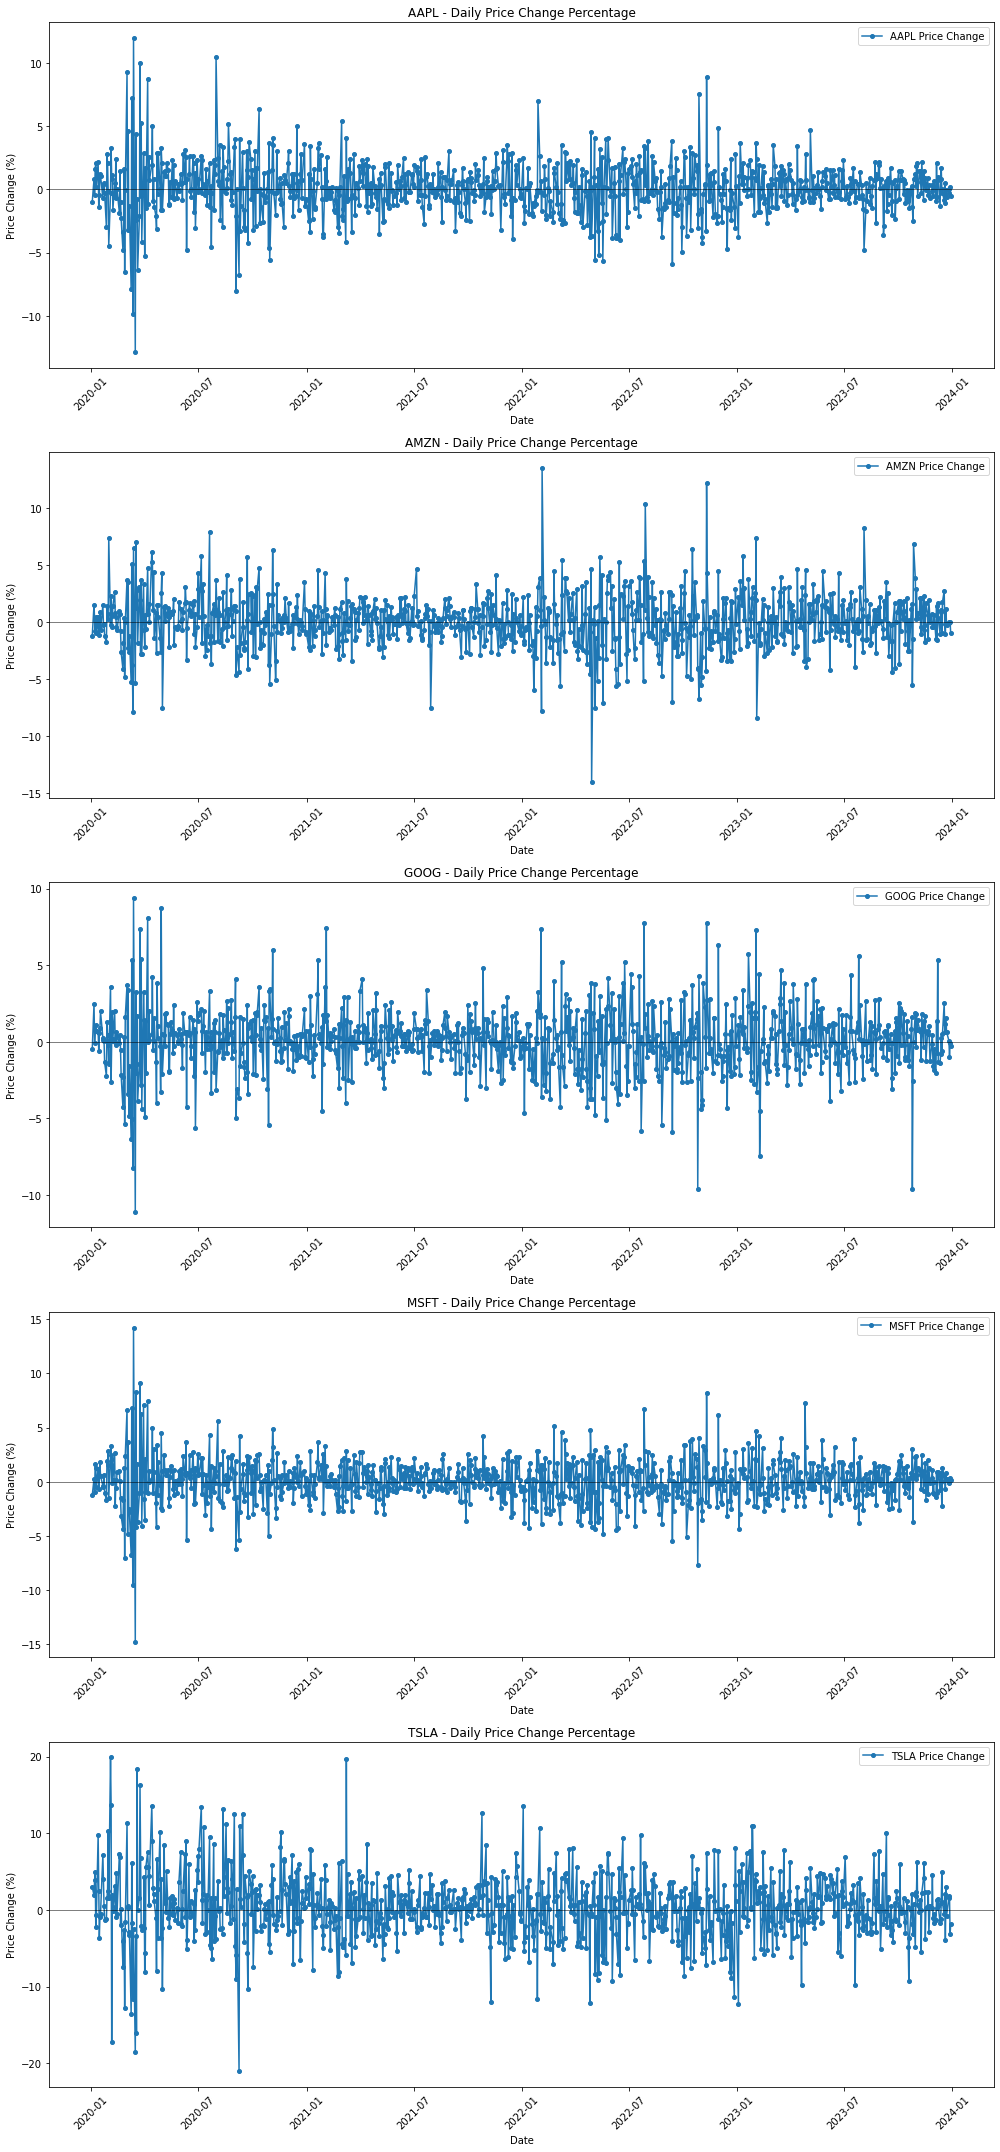

In [104]:
# Filtering for dates from 2020 to the present
df_stocks_volatility = df_stocks_volatility[df_stocks_volatility['Date'] >= '2020-01-01']

# Calculating daily price change percentage for each stock
df_stocks_volatility['Price_Change_Pct'] = df_stocks_volatility.groupby('Stock')['Close'].pct_change() * 100


stocks = df_stocks_volatility['Stock'].unique()
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(14, 6 * num_stocks))

for i, stock in enumerate(stocks):
    subset = df_stocks_volatility[df_stocks_volatility['Stock'] == stock]
    axes[i].plot(subset['Date'], subset['Price_Change_Pct'], label=f'{stock} Price Change', marker='o', linestyle='-', markersize=4)
    axes[i].set_title(f'{stock} - Daily Price Change Percentage')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price Change (%)')
    axes[i].legend()
    axes[i].axhline(0, color='black', linewidth=0.5)  # Reference line at 0%
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Stock Performance Comparison

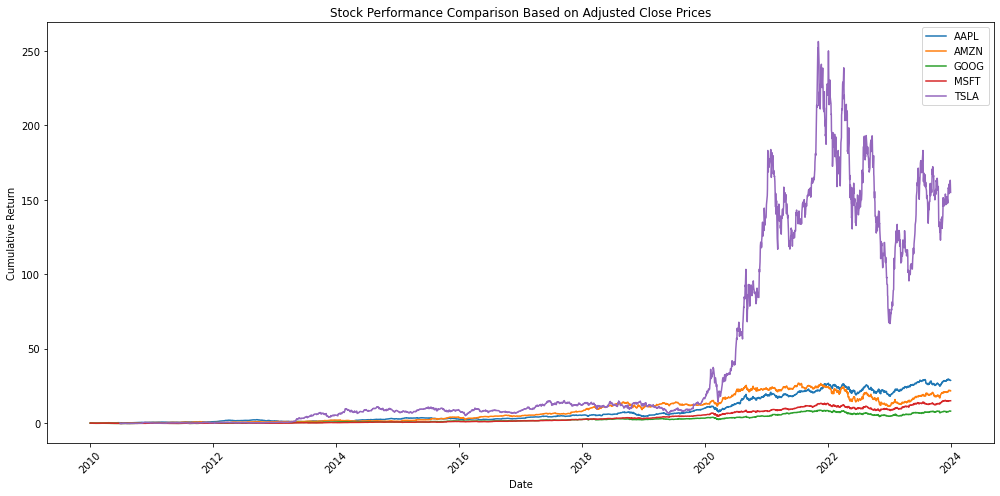

In [105]:
plt.figure(figsize=(14, 7))

# Calculate the percentage change in Adjusted Close price
df_stocks['Adjusted_Close_Change'] = df_stocks.groupby('Stock')['Adjusted_Close'].pct_change()

# Plot the cumulative product of percentage changes to compare performance over time
for stock in df_stocks['Stock'].unique():
    subset = df_stocks[df_stocks['Stock'] == stock]
    # Calculate cumulative return
    cumulative_return = (1 + subset['Adjusted_Close_Change']).cumprod() - 1
    plt.plot(subset['Date'], cumulative_return, label=stock)

plt.title('Stock Performance Comparison Based on Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Volume vs. Price Movements

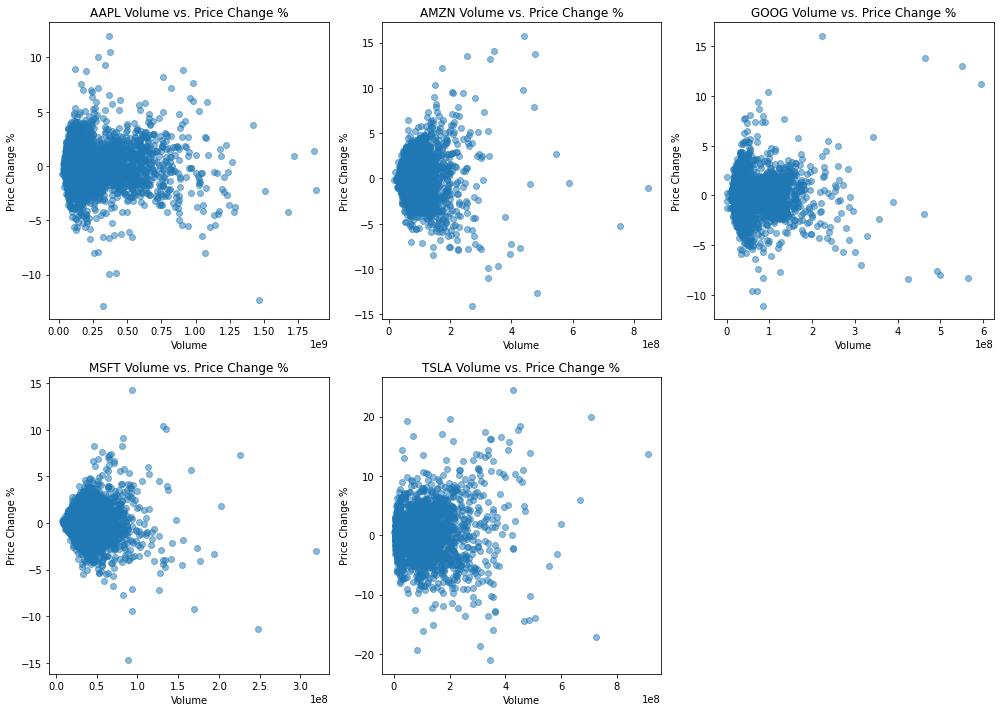

Stock
AAPL   -0.048865
AMZN   -0.002374
GOOG   -0.020670
MSFT   -0.070357
TSLA    0.081663
dtype: float64

In [114]:
# Calculate the day's price change percentage
df_stocks['Price_Change_Pct'] = df_stocks.groupby('Stock')['Close'].pct_change() * 100

# Scatter plot for each stock showing volume vs. price change percentage
plt.figure(figsize=(14, 10))

for i, stock in enumerate(df_stocks['Stock'].unique(), start=1):
    plt.subplot(2, 3, i)
    subset = df_stocks[df_stocks['Stock'] == stock]
    plt.scatter(subset['Volume'], subset['Price_Change_Pct'], alpha=0.5)
    plt.title(f'{stock} Volume vs. Price Change %')
    plt.xlabel('Volume')
    plt.ylabel('Price Change %')

plt.tight_layout()
plt.show()

# Pearson correlation coefficient between volume and price change percentage for each stock
correlation_df = df_stocks.groupby('Stock').apply(lambda x: x[['Volume', 'Price_Change_Pct']].corr().iloc[0, 1])

correlation_df


In [118]:
df_stocks.to_csv('data/stocks/df_stocks.csv')

In [119]:
df_stocks

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,2010-01-04,AAPL,7.660714,7.585000,7.643214,6.479000,493729600.0,1,NaN,NaN
1,2010-01-04,AMZN,6.830500,6.657000,6.695000,6.695000,151998000.0,1,NaN,NaN
2,2010-01-04,GOOG,15.678981,15.547723,15.610239,15.610239,78541293.0,1,NaN,NaN
3,2010-01-04,MSFT,31.100000,30.590000,30.950001,23.474924,38409100.0,1,NaN,NaN
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
...,...,...,...,...,...,...,...,...,...,...
17483,2023-12-29,AAPL,194.399994,191.729996,192.529999,192.529999,42628800.0,12,-0.542413,-0.005424
17484,2023-12-29,AMZN,153.889999,151.029999,151.940002,151.940002,39789000.0,12,-0.938846,-0.009388
17485,2023-12-29,GOOG,141.434998,139.899994,140.929993,140.929993,14872700.0,12,-0.247739,-0.002477
17486,2023-12-29,MSFT,377.160004,373.480011,376.040009,376.040009,18723000.0,12,0.202518,0.002025
